In [1]:
import pandas as pd # data frame library
import numpy as np # scientific computing library
from plotnine import * # plotting library

import warnings
warnings.filterwarnings('ignore')

### Let's go over the basics of plotnine/ggplot

##### First we load a dataset

In [2]:
titanic = pd.read_csv("02-titanic.csv")
titanic.head()

,passengerID,name,age,fare,sex,survived
0,1,"Braund, Mr. Owen Harris",22.0,7.2500,male,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,female,1
2,3,"Heikkinen, Miss. Laina",26.0,7.9250,female,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,female,1
4,5,"Allen, Mr. William Henry",35.0,8.0500,male,0


### Next, we will always use the following combination to draw a plot:

##### 1) What data to use
##### 2) What plot to show
##### 3) Add more information to display

![Image of Yaktocat](https://miro.medium.com/max/1593/1*hd6-LkI_sy4b4nu720eV_A.png)

### 1) What data to use

#### We first call the ggplot function and pass our data variable to it


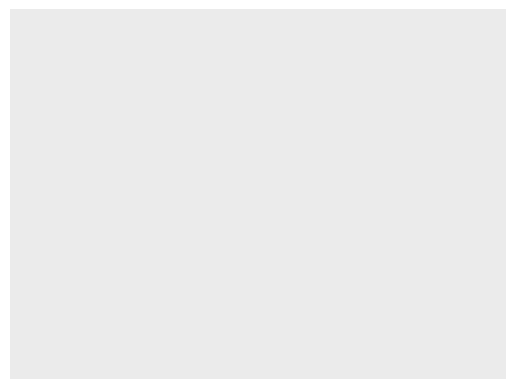

<ggplot: (161193583154)>

In [3]:
ggplot(titanic)

#### Depending on the plot, we also need to specify what the x and y axes are

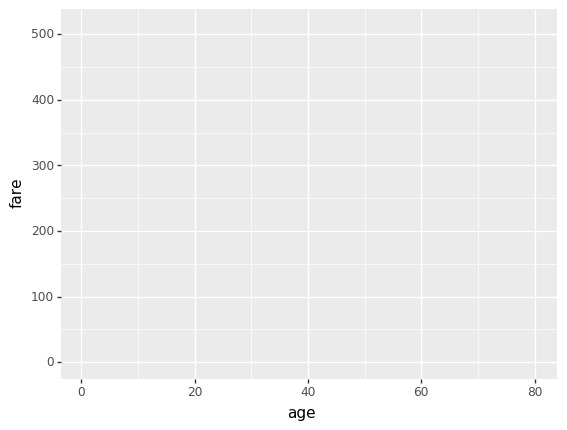

<ggplot: (161080033607)>

In [4]:
ggplot(titanic,aes(x='age',y='fare'))

#### Next we specify what kind of plot we want to show

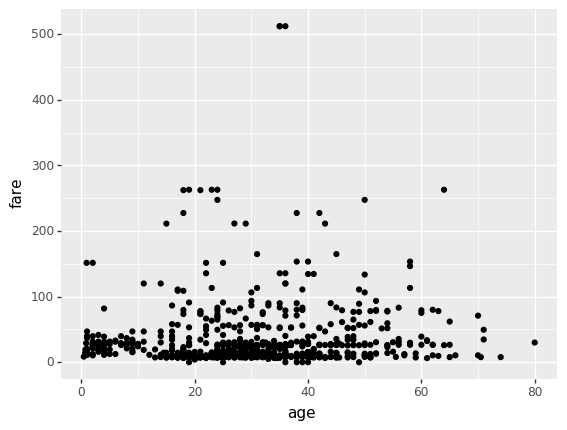

<ggplot: (-9223371875772603655)>

In [5]:
ggplot(titanic,aes(x='age',y='fare')) + geom_point()

#### And finally, we get to add extra information to the plot

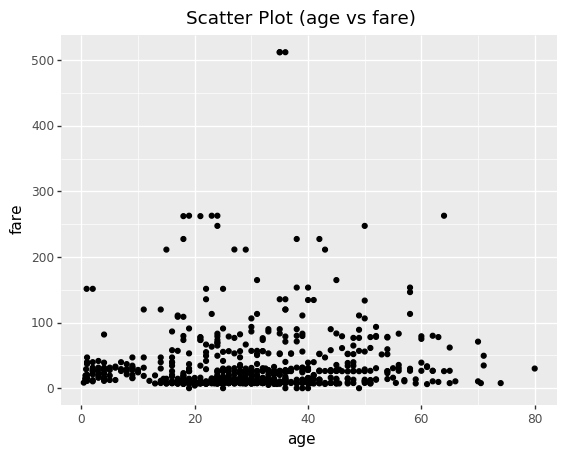

<ggplot: (161082165824)>

In [6]:
ggplot(titanic,aes(x='age',y='fare')) + geom_point() + labs(title = "Scatter Plot (age vs fare)")

#### Gaining more insight

In [15]:
ggplot(titanic,aes(x='age',y='fare',color='survived')) + geom_point() + labs(title = "Scatter Plot (age vs fare)")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerID  891 non-null    int64   
 1   name         891 non-null    object  
 2   age          714 non-null    float64 
 3   fare         891 non-null    float64 
 4   sex          891 non-null    object  
 5   survived     891 non-null    category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 35.9+ KB


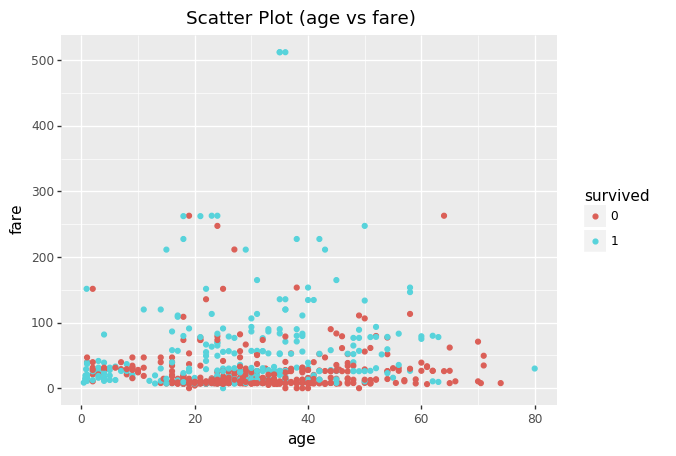

<ggplot: (161082403108)>

In [16]:
titanic['survived'] = pd.Categorical(titanic['survived'])
ggplot(titanic,aes(x='age',y='fare',color='survived')) + geom_point() + labs(title = "Scatter Plot (age vs fare)")

### Let's look at other types of plots:

## Histogram
* To show underlying frequency distribution of a continuous data
* Helps identify the distribution, outliers, and skewness of the data

#### We plot histograms of attributes one at a time

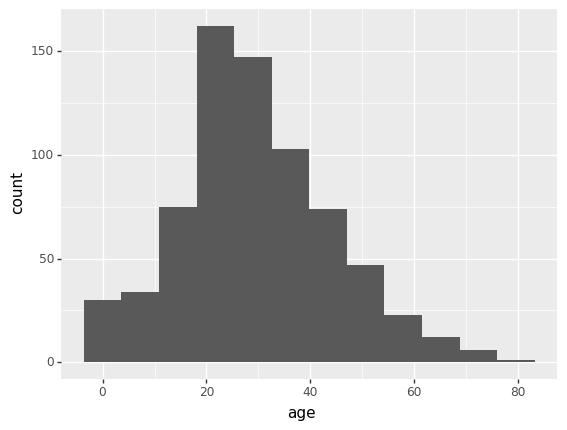

<ggplot: (-9223371875771186116)>

In [17]:
ggplot(titanic,aes(x = 'age'))+geom_histogram()

#### We get to see that the median age lies roughly between 20 to 30 years

In [18]:
titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

#### We can modify how many bins are generated to better visualize the plot

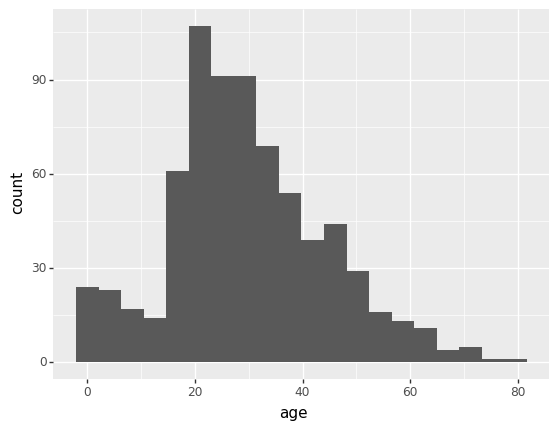

<ggplot: (-9223371875772260699)>

In [23]:
ggplot(titanic,aes(x = 'age'))+geom_histogram(bins=20)

![Image of Yaktocat](https://chartio.com/assets/7fe114/tutorials/charts/histograms/64918b209c6e60b56bee9d8c7ba22dcd854370078e6b8377f272c85119080728/histogram-example-2.png)

## Bar Plot
* Represents categorical data with rectangular bars with height/length proportional to some attribute

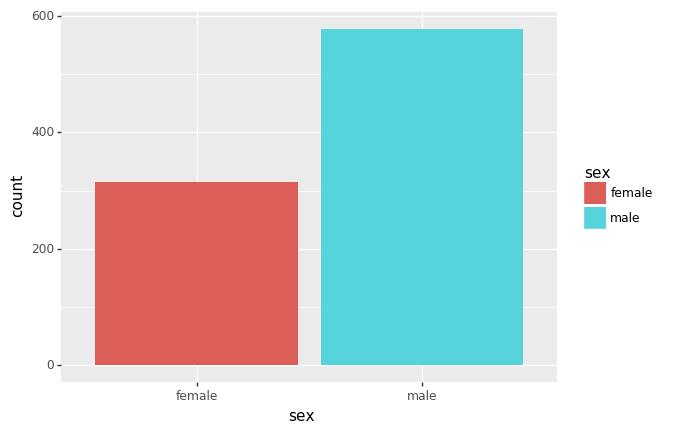

<ggplot: (161082357603)>

In [26]:
ggplot(titanic,aes(x='sex',fill='sex'))+geom_bar() # how to add coloration?

In [27]:
def num2cat(value):
    if 0 < value <= 8:
        return 'low'
    elif 8 < value <= 31:
        return 'mid'
    else:
        return 'high'

titanic['fare_cat'] = titanic['fare'].apply(num2cat)

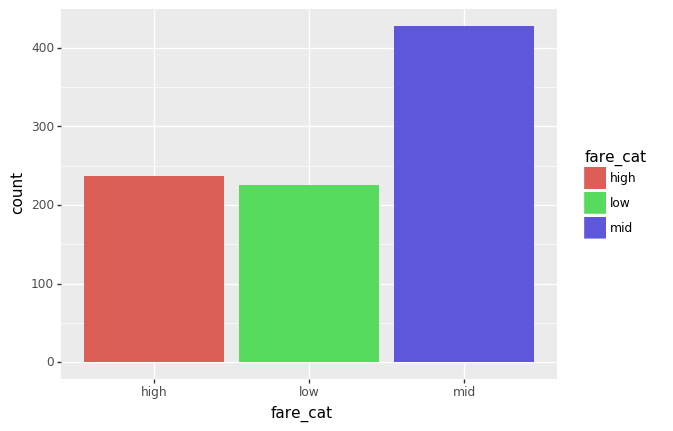

<ggplot: (161083620984)>

In [33]:
ggplot(titanic,aes(x='fare_cat',fill='fare_cat'))+geom_bar()

##### Q. Can we only get the counts for each category using a bar plot?

In [31]:
titanic.groupby(['fare_cat']).mean()

,passengerID,age,fare
fare_cat,,,
high,454.265823,32.109055,83.065349
low,458.672566,28.045455,7.571992
mid,434.731308,29.059192,17.047176


In [35]:
titanic.groupby(['fare_cat'])[['age']].mean().reset_index()

,fare_cat,age
0,high,32.109055
1,low,28.045455
2,mid,29.059192


In [36]:
mean_age = titanic.groupby(['fare_cat'])[['age']].mean().reset_index()
mean_age

,fare_cat,age
0,high,32.109055
1,low,28.045455
2,mid,29.059192


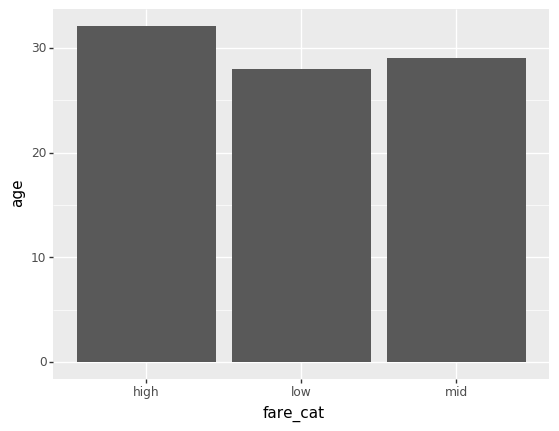

<ggplot: (-9223371875772363853)>

In [37]:
ggplot(mean_age,aes(x='fare_cat',y='age'))+geom_bar(stat='identity')

## Box & Whisker Plot
* Depicts numerical data through quartiles
* Ability to detect outliers and overall spread of data

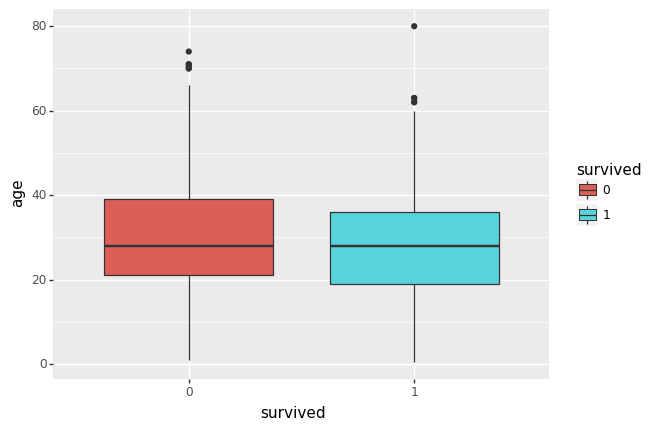

<ggplot: (161083893056)>

In [38]:
ggplot(titanic,aes(x='survived',y='age',fill='survived'))+geom_boxplot()

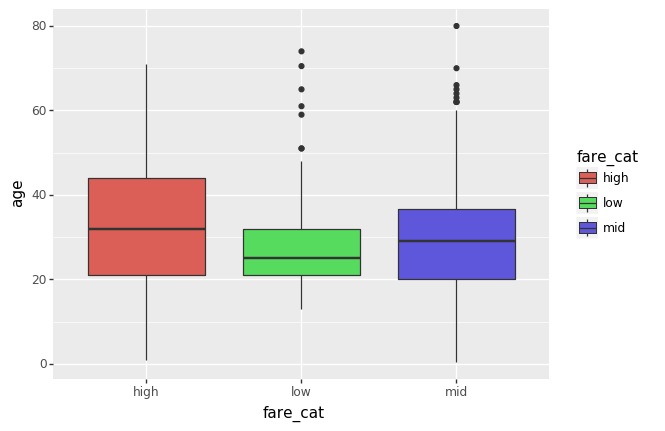

<ggplot: (161082453270)>

In [39]:
ggplot(titanic,aes(x='fare_cat',y='age',fill='fare_cat'))+geom_boxplot()

In [ ]:
ggplot(titanic,aes(x='fare_cat',y='age',fill='fare_cat'))+geom_boxplot()+geom_point()

In [ ]:
ggplot(titanic,aes(x='fare_cat',y='age',fill='survived'))+geom_boxplot()